# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-10-28 07:00:11.798689


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/27/20


,10/27/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,8777432,226691,2.58
Brazil,5439641,157946,2.90
India,7990322,120010,1.50
Mexico,901268,89814,9.97
United Kingdom,920664,45455,4.94
Italy,564778,37700,6.68
France,1244242,35582,2.86


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 10/27/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
48717,US,8637375,2020-10-25,225229.0,340.0,60613.0,68788.428571
48716,US,8576762,2020-10-24,224889.0,914.0,83871.0,67014.285714
48715,US,8492891,2020-10-23,223975.0,943.0,83836.0,63250.142857
48714,US,8409055,2020-10-22,223032.0,856.0,71690.0,61150.714286
48713,US,8337365,2020-10-21,222176.0,1124.0,62761.0,60006.571429
48712,US,8274604,2020-10-20,221052.0,933.0,60330.0,59543.857143
48711,US,8214274,2020-10-19,220119.0,445.0,58418.0,58414.285714


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/27/20


,10/27/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,498646,33433.0,6.70
Texas,904769,18061.0,2.00
California,914888,17460.0,1.91
Florida,786311,16505.0,2.10
New Jersey,231331,16306.0,7.05
Massachusetts,153037,9888.0,6.46
Illinois,387687,9838.0,2.54


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 10/27/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1677,California,906596,2020-10-25,17358.0,15.0,2912.0,4414.857143
1676,California,903684,2020-10-24,17343.0,38.0,4885.0,4295.714286
1675,California,898799,2020-10-23,17305.0,49.0,5435.0,3935.142857
1674,California,893364,2020-10-22,17256.0,89.0,6425.0,3602.285714
1673,California,886939,2020-10-21,17167.0,112.0,3193.0,3105.000000
1672,California,883746,2020-10-20,17055.0,73.0,4101.0,3205.142857
1671,California,879645,2020-10-19,16982.0,3.0,3953.0,3104.571429


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 10/27/20


,10/27/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,302077,7027.0,2.33
Orange,58980,1454.0,2.47
Riverside,66993,1303.0,1.94
San Bernardino,63367,1073.0,1.69
San Diego,55210,877.0,1.59
Sacramento,25601,491.0,1.92
San Joaquin,21729,489.0,2.25


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 10/27/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5317,Los Angeles,299760,2020-10-25,6993.0,4.0,823.0,1615.571429
5316,Los Angeles,298937,2020-10-24,6989.0,15.0,2116.0,1543.000000
5315,Los Angeles,296821,2020-10-23,6974.0,18.0,2756.0,1371.285714
5314,Los Angeles,294065,2020-10-22,6956.0,12.0,3579.0,1126.000000
5313,Los Angeles,290486,2020-10-21,6944.0,32.0,477.0,781.428571
5312,Los Angeles,290009,2020-10-20,6912.0,35.0,643.0,894.142857
5311,Los Angeles,289366,2020-10-19,6877.0,1.0,915.0,912.000000
5310,Los Angeles,288451,2020-10-18,6876.0,13.0,315.0,902.285714
5309,Los Angeles,288136,2020-10-17,6863.0,8.0,914.0,995.857143
5308,Los Angeles,287222,2020-10-16,6855.0,21.0,1039.0,1044.714286



7 day new US cases as of 10/27/20


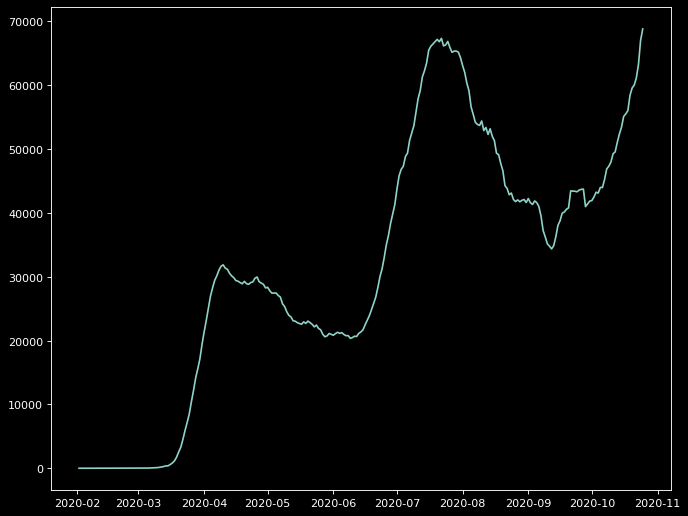

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 10/27/20


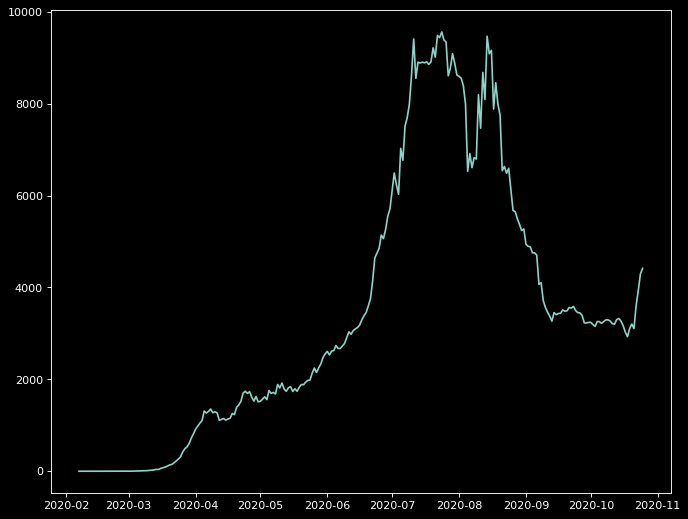

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 10/27/20


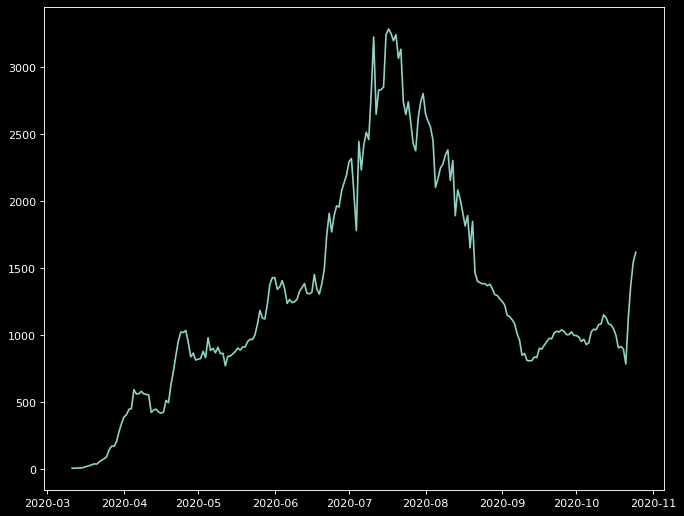

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()